# Non- Linear regression

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
%matplotlib inline
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
np.random.seed(0)

In [ ]:
data=np.load("data.npy")   #first col is feature and second col is label
#data

# Extract X and Y

In [ ]:
x=data[:,0]
X=x.reshape((-1,1))
#X

In [ ]:
y=data[:,1]
Y=y.reshape((-1,1))

In [ ]:
#Y

# discover data

In [ ]:
plt.scatter(X,Y)
plt.xlabel("X")
plt.ylabel("Y")

In [23]:
#from the scatter plot there is a relation between x,y but non linear 

# Split data 

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [25]:
#Apply Simple Linear regression model to see the output
lg=LinearRegression()
lg.fit(x_train,y_train)
ypre=lg.predict(x_test)

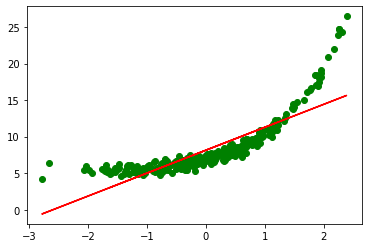

In [26]:
#plot fitted line with data
plt.scatter(x_train,y_train,c='g')
plt.plot(x_train,lg.predict(x_train),'r')  #model prediction 
plt.show()

# Trying to make sense without  PolynomialFeatures library in sklern 

In [27]:
#we will use ploynomial regression to compute the perfet fitted line
#y=a+bx1+cx**2+.....

In [37]:
#Increase more features to get better line
#let`s add x**2 and plot
add_X=X**2
tird=X**3
bias=np.ones_like(add_X)
#tird

# append Two feature

In [40]:
features=np.concatenate((bias,X,add_X,tird),axis=1)
#features

In [41]:
#let`s repeat 
x_tr, x_t, y_tr, y_ts = train_test_split(features, y, test_size=0.2, random_state=2)
x_tr.shape

(320, 4)

In [42]:
lg=LinearRegression()
lg.fit(x_tr,y_tr)
ypre=lg.predict(x_t)

In [45]:
s=metrics.r2_score(ypre,y_ts)

In [46]:
s #ploynominal order 3

0.9680678323653094

# By Using PolynomialFeatures from sklearn

In [63]:
#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(metrics.r2_score(y_test, y_pred))

0.9263211582484191


In [64]:
#x_train_trans

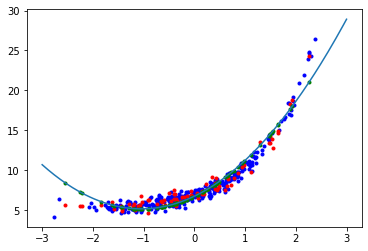

In [65]:
xpoint=np.linspace(-3,3,200).reshape((200,1))
xtransform=poly.transform(xpoint) ## by using transform : learned how to fit data
yp=lr.predict(xtransform)
plt.plot(x_train, y_train,"b.")
plt.plot(x_test,y_test,"r.")
plt.plot(x_test,y_pred,"g.")
plt.plot(xpoint,yp)
